In [1]:
# Import all standard modules we need 

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')

In [3]:
df=pd.read_csv("dataset.csv")

In [4]:
df.head()

,order_id,merchant_id,status,manual_tag,total_spent,auto_decision,model_action,classification_score,base_approve_threshold,base_decline_threshold,declined_excluded,approved_excluded
0,233304594,4831,approved,gray_approve,130.00,False,approve,0.988029,0.939,0.803,False,True
1,225962116,4385,approved,gray_approve,355.00,False,review,0.971906,0.972,0.360,False,True
2,233758550,5556,approved,gray_approve,286.06,False,approve,0.993466,0.910,0.107,False,True
3,224458015,5951,approved,gray_approve,670.65,False,approve,0.987442,0.880,NaN,False,True
4,225152805,1082,chargeback,red,195.00,False,review,0.922034,1.100,NaN,False,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405030 entries, 0 to 405029
Data columns (total 12 columns):
order_id                  405030 non-null int64
merchant_id               405030 non-null int64
status                    405030 non-null object
manual_tag                19284 non-null object
total_spent               405030 non-null float64
auto_decision             405030 non-null bool
model_action              405030 non-null object
classification_score      405030 non-null float64
base_approve_threshold    405030 non-null float64
base_decline_threshold    382108 non-null float64
declined_excluded         405030 non-null bool
approved_excluded         405030 non-null bool
dtypes: bool(3), float64(4), int64(2), object(3)
memory usage: 29.0+ MB


In [59]:
#bin all of the class_score into 50 groups since want 2%

qc = pd.qcut(df["classification_score"], q=50)
score_bin  = qc
df["score_bin"]=qc
df.head()


,order_id,merchant_id,status,manual_tag,total_spent,auto_decision,model_action,classification_score,base_approve_threshold,base_decline_threshold,declined_excluded,approved_excluded,score_bin
0,233304594,4831,approved,gray_approve,130.00,False,approve,0.988029,0.939,0.803,False,True,"(0.9871, 0.9881]"
1,225962116,4385,approved,gray_approve,355.00,False,review,0.971906,0.972,0.360,False,True,"(0.971, 0.9743]"
2,233758550,5556,approved,gray_approve,286.06,False,approve,0.993466,0.910,0.107,False,True,"(0.9934, 0.9939]"
3,224458015,5951,approved,gray_approve,670.65,False,approve,0.987442,0.880,NaN,False,True,"(0.9871, 0.9881]"
4,225152805,1082,chargeback,red,195.00,False,review,0.922034,1.100,NaN,False,True,"(0.9176, 0.9349]"


In [60]:
df.groupby(score_bin).count()

,order_id,merchant_id,status,manual_tag,total_spent,auto_decision,model_action,classification_score,base_approve_threshold,base_decline_threshold,declined_excluded,approved_excluded,score_bin
classification_score,,,,,,,,,,,,,
"(1.62e-05, 0.08153]",8101,8101,8101,140,8101,8101,8101,8101,8101,7781,8101,8101,8101
"(0.08153, 0.2931]",8101,8101,8101,378,8101,8101,8101,8101,8101,7628,8101,8101,8101
"(0.2931, 0.5122]",8100,8100,8100,646,8100,8100,8100,8100,8100,7531,8100,8100,8100
"(0.5122, 0.68]",8101,8101,8101,826,8101,8101,8101,8101,8101,7460,8101,8101,8101
"(0.68, 0.7834]",8100,8100,8100,1725,8100,8100,8100,8100,8100,7268,8100,8100,8100
"(0.7834, 0.8499]",8101,8101,8101,3221,8101,8101,8101,8101,8101,7300,8101,8101,8101
"(0.8499, 0.8918]",8101,8101,8101,3388,8101,8101,8101,8101,8101,7390,8101,8101,8101
"(0.8918, 0.9176]",8100,8100,8100,2493,8100,8100,8100,8100,8100,7441,8100,8100,8100
"(0.9176, 0.9349]",8101,8101,8101,1616,8101,8101,8101,8101,8101,7439,8101,8101,8101


In [82]:
#all auto_dec=true


def autotrue(df):
    return(df.loc[df['auto_decision']== True].shape[0]/df.shape[0])

#autotrue.shape[0]/df.shape[0]
#need to make this for each bin 

df.groupby(score_bin).apply(autotrue)



classification_score
(1.62e-05, 0.08153]    0.982718
(0.08153, 0.2931]      0.953586
(0.2931, 0.5122]       0.921111
(0.5122, 0.68]         0.898531
(0.68, 0.7834]         0.789383
(0.7834, 0.8499]       0.604740
(0.8499, 0.8918]       0.586718
(0.8918, 0.9176]       0.699383
(0.9176, 0.9349]       0.805703
(0.9349, 0.9471]       0.895309
(0.9471, 0.9557]       0.925565
(0.9557, 0.9621]       0.947407
(0.9621, 0.9669]       0.955314
(0.9669, 0.971]        0.955067
(0.971, 0.9743]        0.974444
(0.9743, 0.9771]       0.975601
(0.9771, 0.9794]       0.987015
(0.9794, 0.9814]       0.988273
(0.9814, 0.9831]       0.986545
(0.9831, 0.9846]       0.988148
(0.9846, 0.9859]       0.988767
(0.9859, 0.9871]       0.991852
(0.9871, 0.9881]       0.991853
(0.9881, 0.989]        0.993457
(0.989, 0.9899]        0.993951
(0.9899, 0.9906]       0.994939
(0.9906, 0.9913]       0.995802
(0.9913, 0.9919]       0.995186
(0.9919, 0.9924]       0.996790
(0.9924, 0.993]        0.996050
(0.993, 0.9934]    

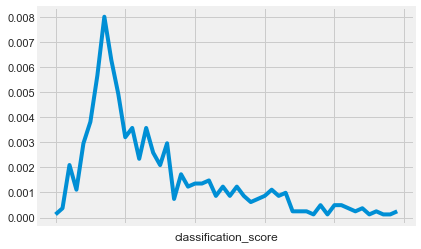

In [112]:
#approval rate



def approvalrate(df):
           return(df.ix[(df['status']== "approve") | (df['status'] == 'chargeback')].shape[0]/df.shape[0])

#overall approval rate
#approvalrate.shape[0]/df.shape[0]

#make approval rate variable for next question
app_rate =df.loc[(df['status']== "approve") | (df['status'] == 'chargeback')]

df.groupby(score_bin).apply(approvalrate).plot()


In [115]:
#chargeback rate 
def chrgback(df):
           return(df.loc[(df['status']== "chargeback")].shape[0])/(df.ix[(df['status']== "approve") | (df['status'] == 'chargeback')].shape[0])

                                    
df.groupby(score_bin).apply(chrgback)
                  
#chrgback=df.loc[(df['status']== "chargeback")]
 #chargeback/ approval rate
#approvalrate.shape[0]/chrgback.shape[0]

classification_score
(1.62e-05, 0.08153]    1.0
(0.08153, 0.2931]      1.0
(0.2931, 0.5122]       1.0
(0.5122, 0.68]         1.0
(0.68, 0.7834]         1.0
(0.7834, 0.8499]       1.0
(0.8499, 0.8918]       1.0
(0.8918, 0.9176]       1.0
(0.9176, 0.9349]       1.0
(0.9349, 0.9471]       1.0
(0.9471, 0.9557]       1.0
(0.9557, 0.9621]       1.0
(0.9621, 0.9669]       1.0
(0.9669, 0.971]        1.0
(0.971, 0.9743]        1.0
(0.9743, 0.9771]       1.0
(0.9771, 0.9794]       1.0
(0.9794, 0.9814]       1.0
(0.9814, 0.9831]       1.0
(0.9831, 0.9846]       1.0
(0.9846, 0.9859]       1.0
(0.9859, 0.9871]       1.0
(0.9871, 0.9881]       1.0
(0.9881, 0.989]        1.0
(0.989, 0.9899]        1.0
(0.9899, 0.9906]       1.0
(0.9906, 0.9913]       1.0
(0.9913, 0.9919]       1.0
(0.9919, 0.9924]       1.0
(0.9924, 0.993]        1.0
(0.993, 0.9934]        1.0
(0.9934, 0.9939]       1.0
(0.9939, 0.9943]       1.0
(0.9943, 0.9947]       1.0
(0.9947, 0.995]        1.0
(0.995, 0.9953]        1.0
(0.9953

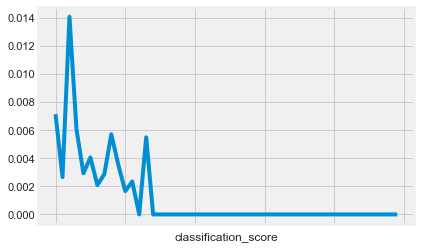

In [109]:
#mannual approve
#(df.ix[((df['status']== "approve") | (df['status'] == 'chargeback')) & (df["auto_decision"]== False)].shape[0])/(df.loc[(df["auto_decision"]==False)].shape[0])

#autofalse
#autofalse= df.loc[(df["auto_decision"]==False)]
#turn above into function 


def manual_per_autof(df):
    return (df.ix[((df['status']== "approve") | (df['status'] == 'chargeback')) & (df["auto_decision"]== False)].shape[0])/(df.loc[(df["auto_decision"]==False)].shape[0])

    


df.groupby(score_bin).apply(manual_per_autof).plot()



 

